# Priceonomics data puzzle

- Author: Jai Miles
- Date: 07/01/2020
- Source: [Priceonomics](https://priceonomics.com/the-priceonomics-data-puzzle-treefortbnb/)



Challenge: Tell us the median price of booking a room in each of the top 100 cities in this data set. 


Stated Considerations:
- More specifically, send us back a table with a list of the median price in each city, ranked from most to least expensive. 
- Restrict your analysis to just to the \"top 100\" cities that have the most units on the market.


Extra Considerations:
- There may be duplicate city names in different states. 
  I will handle this by first grouping cities & states and then counting cities.
  NOTE: Some of these duplicates may be from data entry, e.g., Berkeley, CO is a city neighborhood.

- Don't assume that all data has uniform input.
  After working with the data, I discovered case inconsistencies, 
  e.g., New York, NY vs new york, NY. In analysis, I considered these the same cities.

- Some locations may be listed under different names. 
  After grouping the data, I noticed that Miami and Miami beach are both listed. 
  With some research, I decided to group the two separately. [Source](https://www.tripadvisor.com/ShowTopic-g34438-i92-k1409657-Whats_the_difference_between_miami_and_miami_beach-Miami_Florida.html)

# Libraries & Packages

Section Steps
1. Install libraries
2. Load libraries

dplyr - data manipulation and analysis.
purr - data validation and extra analysis at end.
huxtable - pretty printing results to console.
ggplot2 - additional data exploration.


## Install

In [3]:
## Uncomment below to install

packages = c(
  "dplyr",
  "purrr",
  "huxtable",
  "ggplot2"
)

for (p in packages) {
  if (!require(p, character.only = T)) {
    install.packages(p)
  }
}

Loading required package: huxtable
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'huxtable'"also installing the dependencies 'commonmark', 'memoise'



package 'commonmark' successfully unpacked and MD5 sums checked
package 'memoise' successfully unpacked and MD5 sums checked
package 'huxtable' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Jai\AppData\Local\Temp\RtmpsfRwKj\downloaded_packages


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


## Load

In [4]:

for (p in packages) {
  library(p, character.only = T)
}


Warning message:
"package 'huxtable' was built under R version 3.6.3"
Attaching package: 'huxtable'

The following object is masked from 'package:ggplot2':

    theme_grey

The following object is masked from 'package:dplyr':

    add_rownames



# Import & Clean Data
Section Steps
1. Import data
2. Clean column names
3. Check for missing values
4. Check all data is correct type
5. Clean string data

## Import Data

In [7]:
## Get current working directory for import (if needed)
getwd()   # C:/Users/Jai/Documents/
filename_data = "C:/Users/Jai/Documents/github/priceonomics_data_puzzle/Data+for+TreefortBnB+Puzzle.csv"

data_treefortbnb <- read.csv(filename_data,
                             header = TRUE,
                             sep = ",",
                             strip.white = TRUE
                            )
View(data_treefortbnb)

[1] "C:/Users/Jai/Desktop/job_stuff/sample_works"

ERROR: Error in View(data_treefortbnb): 'View()' not yet supported in the Jupyter R kernel


## Clean column names

In [8]:
colnames(data_treefortbnb)

new_col_names <- c(
  "id",
  "city",
  "state",
  "price_USD",
  "num_reviews"
)
colnames(data_treefortbnb) <- new_col_names
colnames(data_treefortbnb)

[1] "Unique.id"     "City"          "State"         "X..Price"     
[5] "X..of.Reviews"

[1] "id"          "city"        "state"       "price_USD"   "num_reviews"

## Check missing values

In [9]:
colSums( is.na(data_treefortbnb))   # No N/As to handle


id        city       state   price_USD num_reviews 
          0           0           0           0           0

## Check dataframe types

In [12]:
## Check type of each column
is_integer(data_treefortbnb$id)
is_character(data_treefortbnb$city)
is_character(data_treefortbnb$state)
is_numeric(data_treefortbnb$price_USD)
is_integer(data_treefortbnb$num_reviews)


[1] TRUE

[1] FALSE

[1] FALSE

Warning message:
"Deprecated"

[1] TRUE

[1] TRUE

NOTE:
city & state yield false for is_character test. This behavior can be inconsistent, so investigate.

In [14]:
typeof(data_treefortbnb$city)
typeof(data_treefortbnb$state)

sort(unique(data_treefortbnb$city))   ## Note: not uniform case across city names
sort(unique(data_treefortbnb$state))

[1] "integer"

[1] "integer"

[1] Albuquerque       Alexandria        Anchorage         Ann Arbor        
  [5] Arlington         Atlanta           Austin            Baltimore        
  [9] Berkeley          Beverly Hills     Boston            Boulder          
 [13] Bronx             Brookline         Brooklyn          Cambridge        
 [17] Carlsbad          Carmel            Charleston        Charlotte        
 [21] Chicago           Cincinnati        Colorado Springs  Dallas           
 [25] Davenport         Denver            Durham            Eugene           
 [29] Fort Lauderdale   Glendale          Healdsburg        Hermosa Beach    
 [33] Hollywood         Honolulu          Houston           Incline Village  
 [37] Indianapolis      Jersey City       Kissimmee         La Jolla         
 [41] Laguna Beach      Las Vegas         Long Beach        Long Island City 
 [45] LONG ISLAND CITY  Los Angeles       Louisville        Madison          
 [49] Malibu            Manhattan Beach   Marina del Rey    Marina Del Rey   
 [53] miami             Miami             Miami Beach       Mill Valley      
 [57] Minneapolis       Mountain View     Napa              Naples           
 [61] Nashville         New Haven         New Orleans       new york         
 [65] New York          Newport Beach     Oakland           Orlando          
 [69] Palo Alto         Paris             Park City         Pasadena         
 [73] Philadelphia      Phoenix           Pittsburgh        Portland         
 [77] Providence        Queens            Raleigh           Richmond         
 [81] Sacramento        Salt Lake City    San Antonio       San Diego        
 [85] San Francisco     San Jose          San Rafael        Santa Cruz       
 [89] Santa Monica      Santa Rosa        Sausalito         Savannah         
 [93] Scottsdale        Seattle           Sebastopol        Silver Spring    
 [97] Somerville        Sonoma            Sunny Isles Beach Tampa            
[101] Taos              Truckee           Tucson            Venice           
[105] Washington        West Hollywood   
106 Levels: Albuquerque Alexandria Anchorage Ann Arbor Arlington ... West Hollywood

[1] AK AZ CA CO CT DC FL GA HI IA IL IN KY LA MA MD MI MN NC NH NJ NM NV NY OH
[26] OR PA RI SC TN TX UT VA WA WI
35 Levels: AK AZ CA CO CT DC FL GA HI IA IL IN KY LA MA MD MI MN NC NH ... WI

Strings were automatically converted to factors, which are built ontop of the integer class.

Also, need to transform factors to lowercase for consistency, e.g., new york, NY vs New York, NY.

## Clean string data

In [15]:
## Make all cities & states lowercase for grouping.
data_treefortbnb$city <- tolower(data_treefortbnb$city)
data_treefortbnb$state <- tolower(data_treefortbnb$state)
View(data_treefortbnb)

sort(unique(data_treefortbnb$city))
sort(unique(data_treefortbnb$state))

ERROR: Error in View(data_treefortbnb): 'View()' not yet supported in the Jupyter R kernel


# Analysis

Section Steps
1. Count duplicate city names
2. Find top 100 cities with most units on market
3. Sort by price, units
4. Format data (USD Format, case, remove units and reviews)


## Count duplicates

In [18]:
## Group by city & state, then summarise

unique_city_states <- data_treefortbnb %>% 
  group_by( city, state) %>% 
  summarise()

unique_city_states

city,state
albuquerque,nm
alexandria,va
anchorage,ak
ann arbor,mi
arlington,va
atlanta,ga
austin,tx
baltimore,md
berkeley,ca
berkeley,co


In [19]:
## Count duplicate states
sum( duplicated( unique_city_states$city))


[1] 22

Found that there are 22 cities with the same name, e.g., Berkeley CA & Berkeley CO.
This is good to know, but overlapping city names are already handled by group_by(city, state)

## Top 100 cities

- Group by city and state
- then count units and calc med
- then arrange by units.

In [20]:

median_cost_per_city <- data_treefortbnb %>%
  group_by( city, state) %>%
  summarise(
    units = n(),
    median_price_USD = median(price_USD),
    total_reviews = sum(num_reviews)
  ) %>% 
  arrange( desc(units))

View(median_cost_per_city)

ERROR: Error in View(median_cost_per_city): 'View()' not yet supported in the Jupyter R kernel


In [21]:
# Quick data check that same number of units and reviews as initial dataset
sum(median_cost_per_city$units) == nrow(data_treefortbnb)
sum(median_cost_per_city$total_reviews) == sum(data_treefortbnb$num_reviews)

[1] TRUE

[1] TRUE

In [22]:
## Take top 100 cities on market
top_100_cities <- head(median_cost_per_city, 100)
View(top_100_cities)


ERROR: Error in View(top_100_cities): 'View()' not yet supported in the Jupyter R kernel


## Sort by price, units

In [23]:
top_100_cities_by_price <- top_100_cities[order(-top_100_cities$median_price_USD, - top_100_cities$units),]
View(top_100_cities_by_price)


ERROR: Error in View(top_100_cities_by_price): 'View()' not yet supported in the Jupyter R kernel


## Format data

- Change median_price_USD to 2 decimal format
- Uppercase states
- Title case cities
- Remove unit column -- excess information not requested

In [24]:
## USD Format
top_100_cities_by_price$median_price_USD <- format( 
  round( top_100_cities_by_price$median_price_USD, 2), 
  nsmall = 2)
View(top_100_cities_by_price)

ERROR: Error in View(top_100_cities_by_price): 'View()' not yet supported in the Jupyter R kernel


In [25]:
## Upper case states
top_100_cities_by_price$state <- toupper(top_100_cities_by_price$state)

In [26]:
# function to capitalize each word.
capwords <- function(s, strict = FALSE) {
  cap <- function(s) paste(toupper(substring(s, 1, 1)),
                           {s <- substring(s, 2); if(strict) tolower(s) else s},
                           sep = "", collapse = " " )
  sapply(strsplit(s, split = " "), cap, USE.NAMES = !is.null(names(s)))
}

In [27]:
top_100_cities_by_price$city <- capwords(top_100_cities_by_price$city)

View(top_100_cities_by_price)

ERROR: Error in View(top_100_cities_by_price): 'View()' not yet supported in the Jupyter R kernel


In [28]:
## Remove units & total_reviews column

top_100_cities_by_price$units <- NULL
top_100_cities_by_price$total_reviews <- NULL
View(top_100_cities_by_price)

ERROR: Error in View(top_100_cities_by_price): 'View()' not yet supported in the Jupyter R kernel


# Export data
Section Steps
1. Pretty print table to console
2. Export table to csv

## Pretty print to console

In [29]:
hux_top_100_cities_by_price <- 
  hux(top_100_cities_by_price) %>% 
  theme_basic() %>% 
  set_tb_padding(4)

print_screen(hux_top_100_cities_by_price,
             colnames = FALSE)

                  city                state   median_price_USD  
                ------------------------------------------------
                  Indianapolis        IN      650.00            
                  Malibu              CA      304.00            
                  Park City           UT      299.00            
                  Truckee             NV      275.00            
                  Healdsburg          CA      275.00            
                  Laguna Beach        CA      268.50            
                  Incline Village     NV      259.00            
                  Manhattan Beach     CA      209.00            
                  Charlotte           NC      200.00            
                  Sonoma              CA      200.00            
                  Napa                CA      200.00            
                  Austin              TX      199.00            
                  La Jolla            CA      195.00            
                  Sausali

## Export table

In [30]:
solution_file_name = "Miles_Jai_Priceonomics_Puzzle_Solution.csv"

write.csv(top_100_cities_by_price,
          file = solution_file_name
          )

# Additional Analysis

I did not expect Indianapolis, IN to have the highest median price.
I expected it to be high, but I consider it curious that it ranks higher than  
more populous, globally recognized cities like Los Angeles, and New York.
This is where specific domain knowledge, e.g., about the housing market, would 
be useful to understand the data.

Because the median is a robust statistic, the calculated unit price for Indianapolis, IN 
is not affected by outliers. I would be interested to closer inspect the city's data quartiles.
It is possible that the data follows a bimodal distribution, and there are more rentals offered 
in the higher pricing cluster. This would explain a higher median.

In [31]:
data_indianapolis_in <- data_treefortbnb %>% 
  filter(state == "in", city == "indianapolis")

View(data_indianapolis_in)

data_indianapolis_in %>% 
  summarise(
    num_units = n(),
    mean_cost = mean(price_USD),
    st_dev = sd(price_USD),
    min_price = min(price_USD),
    max_price = max(price_USD)
  )

ERROR: Error in View(data_indianapolis_in): 'View()' not yet supported in the Jupyter R kernel


In [32]:
"Note: slight difficulties with quantiles in dplyr. Need to pre-define quantiles, names, and functions before running."
percents <- c(0.25, 0.5, 0.75)    # define quantiles of interest
perc_names <- map_chr(percents, ~paste0(.x * 100, "%"))   # Create quantile names.
p_funcs <- map(percents, ~ partial(quantile, probs = .x, na.rm = TRUE)) %>% 
  set_names(nm = perc_names)
p_funcs

[1] "Note: slight difficulties with quantiles in dplyr. Need to pre-define quantiles, names, and functions before running."

$`25%`
<partialised>
function (...) 
quantile(probs = .x, na.rm = TRUE, ...)

$`50%`
<partialised>
function (...) 
quantile(probs = .x, na.rm = TRUE, ...)

$`75%`
<partialised>
function (...) 
quantile(probs = .x, na.rm = TRUE, ...)

In [33]:
data_indianapolis_in %>% 
  summarise_at(
    vars(price_USD), funs(!!!p_funcs)
  )


Warning message:
"funs() is soft deprecated as of dplyr 0.8.0
please use list() instead

# Before:
funs(name = f(.)

# After: 
list(name = ~f(.))
This warning is displayed once per session."

25%,50%,75%
162.5,650,1200


Wow! Maximum price of 5,500 and q3 at 1,200. Something is definitely happening with the
treehouse market in Indianapolis.

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"ERROR while rich displaying an object: Error: stat_boxplot requires the following missing aesthetics: y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, erro

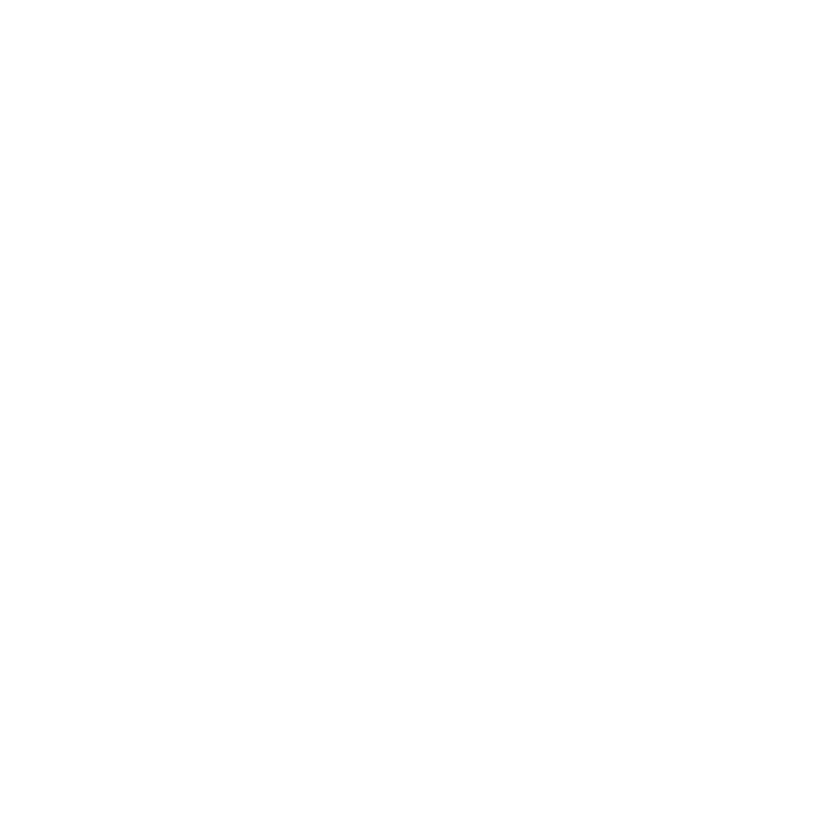

In [37]:
ggplot(data = data_indianapolis_in, mapping = aes(x = price_USD)) + 
  geom_boxplot()


There are quite a few outliers past 2,000 USD.
The spirit of a central measure (median above) is to get something normal. 
With 251 observations, I still would not call anything in excess of $2,000 normal.

Let's plot this data vs the number of reviews.

[1] "id"          "city"        "state"       "price_USD"   "num_reviews"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


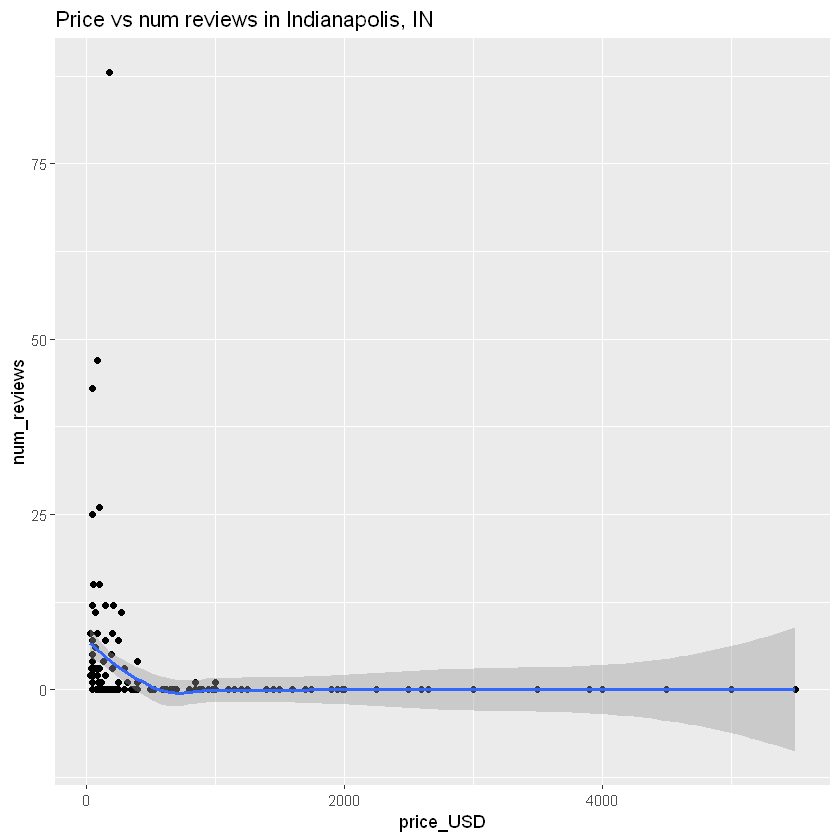

In [38]:
colnames(data_indianapolis_in)
ggplot(data = data_indianapolis_in, 
       mapping = aes(x = price_USD, y = num_reviews)
       ) + 
  geom_point() +
  geom_smooth() +  # regression line
  ggtitle("Price vs num reviews in Indianapolis, IN")


The graph shows that prices above $1,000 USD have 0 reviews.
If we consider reviews to be a proxy variable for visits, we can assume that these
units do not constitute normal treefortBnb experiences.

## Investigate cities outside top 100

In [39]:
lower_median_cost_per_city <- tail(median_cost_per_city, 24)
View(lower_median_cost_per_city)

ERROR: Error in View(lower_median_cost_per_city): 'View()' not yet supported in the Jupyter R kernel


Looking at the  median cost per city outside of the top 100, there are 12 cities with a 
single unit available. Many of these cities with a single unit have no reviews, 
while 3/4 of the cities with 2 units have 10+ reviews.

Many of these cities are duplicate names, e.g., Berkeley, CO. 
Upon further investigation, I discovered that Berkeley is a neighborhood city in Denver.
[Source](https://en.wikipedia.org/wiki/Berkeley,_Denver)

I would be interested in double checking these low-entry units for clerical errors.
In the case of Berkeley, CO, this may reflect the data entry system and the correct
city is Berkeley, CA.